# Práctica de deep learning utilizando la base de datos de Airbnb

Juan David Pardo P.

#Objetivo

El objetivo de la práctica final del módulo de Deep Learning es abordar un problema del mundo real utilizando las técnicas enseñadas en clase. Específicamente, se busca predecir el precio de las habitaciones de AirBnb utilizando todas las características disponibles en el dataset.

El propósito principal no es lograr un sistema con una precisión extremadamente alta, sino más bien que los estudiantes combinen diferentes tipos de características (numéricas, texto, imágenes, etc.) y expliquen cómo lo han hecho.

En el siguiente enlace, se proporciona un ejemplo de cómo se pueden combinar diferentes tipos de características utilizando una red neuronal:

[Keras Multiple Inputs and Mixed Data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)

El conjunto de datos seleccionado se obtuvo de Airbnb mediante técnicas de scraping. Recomiendo utilizar el extracto "Only the 14780 selected records", ya que reduce el tiempo de ejecución y evita problemas de memoria en equipos con menos recursos.

# Instalación e Importación de librerías.

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [225]:
import pandas as pd
import numpy as np

# #Librerías carga de imágenes
from typing import Optional, Union
from tqdm import tqdm
import imageio.v3 as io
import cv2
import seaborn as sns

#Matplolib Settings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# División datos test y entrenamiento
from sklearn.model_selection import train_test_split

# #Estadarización/Normalización
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# #Tensorflow Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import L1
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input


# Descarga y preprocesado de los datos

Descargar los datos, almacenar las imágenes y eliminar filas del CSV para los cuales no se haya descargado la imagen.

In [226]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-10 06:58:05--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [          <=>       ]  52.85M  21.1MB/s    in 2.5s    

2024-03-10 06:58:09 (21.1 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [227]:
# Validamos la descarga del dataset
!ls -lah

total 68M
drwxr-xr-x 1 root root 4.0K Mar 10 06:26 .
drwxr-xr-x 1 root root 4.0K Mar 10 06:16 ..
-rw-r--r-- 1 root root  53M Mar 10 06:58 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Mar  7 14:31 .config
drwx------ 5 root root 4.0K Mar 10 06:23 drive
-rw-r--r-- 1 root root 233K Mar 10 06:46 filtered_data.csv
-rw-r--r-- 1 root root 7.1M Mar 10 06:46 images_airbnb.npy
-rw-r--r-- 1 root root  19K Mar 10 06:56 model.png
drwxr-xr-x 1 root root 4.0K Mar  7 14:32 sample_data
-rw-r--r-- 1 root root  59K Mar 10 06:54 test_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 test_images_airbnb.npy
-rw-r--r-- 1 root root 117K Mar 10 06:54 train_airbnb.csv
-rw-r--r-- 1 root root 3.6M Mar 10 06:55 train_images_airbnb.npy
-rw-r--r-- 1 root root  59K Mar 10 06:54 valid_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 valid_images_airbnb.npy


In [228]:
#Leemos los datos y quitamos precios nulos
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(3).T

,0,1,2
ID,16536728,14800288,12357427
Listing Url,https://www.airbnb.com/rooms/16536728,https://www.airbnb.com/rooms/14800288,https://www.airbnb.com/rooms/12357427
Scrape ID,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08
Name,Ático en el Barrio de Salamanca,"Salamanca Comfort XI, Friendly Rentals",Apt. by the music Conservatory!!
Summary,Precioso ático en el barrio de Salamanca. Dos...,"Lugares de interés: Fide, Bienmesabe, Restaura...",Very bright apartment with 2 bedrooms 1 with p...
Space,NaN,Apartamento de nueva construcción (julio 2016)...,NaN
Description,Precioso ático en el barrio de Salamanca. Dos...,Apartamento de nueva construcción (julio 2016)...,Very bright apartment with 2 bedrooms 1 with p...
Experiences Offered,none,none,none
Neighborhood Overview,NaN,"Localizado en el distrito de Salamanca, uno de...",NaN


Se valida el tipo de datos con el que trabajara en dataset.

In [229]:
# Obtiene el valor actual del número máximo de filas
max_rows = pd.get_option('display.max_rows')

# Imprime el valor actual del número máximo de filas
print(f'Número máximo de filas: {max_rows}')

# Set_option para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Muestra los tipos de datos de todas las columnas
data.info()

Número máximo de filas: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14001 entries, 0 to 14000
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14001 non-null  int64  
 1   Listing Url                     14001 non-null  object 
 2   Scrape ID                       14001 non-null  int64  
 3   Last Scraped                    14001 non-null  object 
 4   Name                            14001 non-null  object 
 5   Summary                         13451 non-null  object 
 6   Space                           10306 non-null  object 
 7   Description                     13995 non-null  object 
 8   Experiences Offered             14001 non-null  object 
 9   Neighborhood Overview           8630 non-null   object 
 10  Notes                           5288 non-null   object 
 11  Transit                         8552 non-null   object 
 12  Acc

In [230]:
# Validando el numero de columnas y filas del dataset
data.shape

(14001, 89)

# Se llevará a cabo una limpieza preliminar antes de procesar los datos.


En los análisis de los módulos anteriores se observó que la gran mayoría de los datos están distribuidos en España.

In [231]:
countries = data['Country'].value_counts()
print(countries)

Spain    14001
Name: Country, dtype: int64


Tras realizar un análisis más detallado de los datos de España, se descubrió que el 94.33% de los registros provienen de la ciudad de Madrid. Por esta razón, se ha tomado la decisión de concentrar todo el proceso de análisis en dicha ciudad.

In [232]:
import pandas as pd

# Filtrar solo las filas correspondientes a Spain
spain_data = data[data['Country'] == 'Spain']

# Obtener el número de registros por ciudad en Spain
city_counts = spain_data['City'].value_counts()

# Mostrar la lista de número de registros por ciudad
print("Número de registros de Spain por ciudad:")
print(city_counts)


Número de registros de Spain por ciudad:
Madrid                                 13207
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
Madrid, Comunidad de Madrid, ES           20
Palma de Mallorca                         16
Selva                                     13
Inca                                      13
Búger                                     11
Pollença                                  10
Deià                                       9
Santa Margalida                            8
madrid                                     8
Sóller                                     7
Campanet                                   6
Sant Llorenç des Cardassar                 6
Valldemossa                                6
Pollensa                                   6
Manacor                                    6
La Puebla                                  6
Can Picafort  

Se identificó la necesidad de realizar ajustes en varios registros del conjunto de datos para lograr una normalización completa de todos los registros correspondientes a Madrid

In [233]:
# Definir los nombres incorrectos que quieres reemplazar por 'Madrid'
incorrect_names = ['Chueca, Madrid','é©¬å¾·é','las matas  madrid','Comunidad de Madrid','Centro, Madrid','Delicias-Madrid','Aravaca (Madrid)','Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'Madri', 'Madid','Madrid, Vallecas (FontarrÃ³n)','Madrid, Comunidad de Madrid, ESPANA']

# Filtrar solo las filas correspondientes a 'Spain'
spain_data_fix = data[data['Country'] == 'Spain']

# Utilizar .loc para evitar el SettingWithCopyWarning
spain_data_fix.loc[:, 'City'] = spain_data_fix['City'].replace(incorrect_names, 'Madrid')

# Mostrar la lista actualizada de registros por ciudad en Spain
city_counts = spain_data_fix['City'].value_counts()
print("Número de registros de Spain por ciudad (actualizado):")
print(city_counts)

Número de registros de Spain por ciudad (actualizado):
Madrid                                 13246
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
Palma de Mallorca                         16
Selva                                     13
Inca                                      13
Búger                                     11
Pollença                                  10
Deià                                       9
Santa Margalida                            8
Sóller                                     7
Pollensa                                   6
Sant Llorenç des Cardassar                 6
Valldemossa                                6
Manacor                                    6
La Puebla                                  6
Campanet                                   6
Can Picafort                               5
Muro                                       5


Se procede a eliminar todas las filas que no corresponden a Madrid con el objetivo de centrar nuestro análisis en la ciudad que presenta la mayor cantidad de datos disponibles.

In [234]:
def filter_madrid(data_frame):
    # Filtrar solo las filas correspondientes a 'Spain'
    spain_data_fix = data_frame[data_frame['Country'] == 'Spain']

    # Filtrar las filas donde 'City' sea 'Madrid'
    madrid_data_fix = spain_data_fix[spain_data_fix['City'] == 'Madrid']

    return madrid_data_fix

# Llama a la función para filtrar Madrid y almacenar en airbnb_df_madrid
airbnb_df_madrid = filter_madrid(spain_data)
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

airbnb_df_madrid.head(3).T

,0,1,2
ID,16536728,14800288,12357427
Listing Url,https://www.airbnb.com/rooms/16536728,https://www.airbnb.com/rooms/14800288,https://www.airbnb.com/rooms/12357427
Scrape ID,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08
Name,Ático en el Barrio de Salamanca,"Salamanca Comfort XI, Friendly Rentals",Apt. by the music Conservatory!!
Summary,Precioso ático en el barrio de Salamanca. Dos...,"Lugares de interés: Fide, Bienmesabe, Restaura...",Very bright apartment with 2 bedrooms 1 with p...
Space,NaN,Apartamento de nueva construcción (julio 2016)...,NaN
Description,Precioso ático en el barrio de Salamanca. Dos...,Apartamento de nueva construcción (julio 2016)...,Very bright apartment with 2 bedrooms 1 with p...
Experiences Offered,none,none,none
Neighborhood Overview,NaN,"Localizado en el distrito de Salamanca, uno de...",NaN


Procedemos a validar que los cambios se hayan efectuado exitosamente. Se observa que en la variable 'Country' solo aparece 'Spain', y en la variable 'City' solo tenemos registros asociados a Madrid. Confirmamos entonces que el ajuste se aplicó de manera correcta.

In [235]:
countries = airbnb_df_madrid['Country'].value_counts()
print(countries)

Spain    13207
Name: Country, dtype: int64


In [236]:
# Filtrar solo las filas correspondientes a Spain
spain_data = airbnb_df_madrid[airbnb_df_madrid['Country'] == 'Spain']
# Obtener el número de registros por ciudad en Spain
city_counts = spain_data['City'].value_counts()
# Mostrar la lista de número de registros por ciudad
print("Número de registros de Spain por ciudad:")
print(city_counts)

Número de registros de Spain por ciudad:
Madrid    13207
Name: City, dtype: int64


Ahora procedemos a validar la variable 'Zipcode'.

In [237]:
# Llama los Zipcode y los cuenta
print ("Madrid muestra los siguientes valores en 'Zipcode':\n",data.loc[data['City'] == 'Madrid', 'Zipcode'].value_counts())
# Llama el tipo de dato
df_zipcode = data.loc[data['City'] == 'Madrid', 'Zipcode'].value_counts()
# Cuenta el numero de NAN en la columna
print("\n Tambien se encuentran ", data.loc[data['City'] == 'Madrid', 'Zipcode'].isna().sum(), " NAN con lo que se comprueba el total: \n")
# Cuenta el numero de valores unicos
df_zipcode.shape

Madrid muestra los siguientes valores en 'Zipcode':
 28012           2060
28004           1794
28005           1194
28013           1019
28014            630
28015            600
28045            495
28010            384
28008            338
28028            263
28011            250
28001            231
28006            218
28009            216
28007            206
28019            200
28020            192
28003            185
28002            170
28039            160
28025            123
28027            122
28029            110
28017            107
28043            103
28026             93
28042             90
28033             89
28053             85
28038             77
28016             76
28030             73
28036             67
28047             67
28037             65
28041             63
28035             59
28021             58
28050             58
28034             45
28024             44
28018             43
28032             33
28046             32
28022             30
28

(76,)

Vamos a ajustar la columna de Zipcode

In [238]:
# Ajustes de códigos postales
corrections = {'28002\n28002': 28002, '2802\n28012': 28012, '08015': 28015, '28051\n28051': 28051, 'Madrid 28004': 28004, 25008: 28008,
                2805: 28015, 280013: 28013, 2015: 28015, 2804: 28004, 29012: 28012, 27013: 28013, 2815: 28015, 10100: 28100, 20013: 28013,
                20126: 28126, 27004: 28004, 29230: 28830
               }

# Ajustar códigos postales
airbnb_df_madrid['Zipcode'] = airbnb_df_madrid['Zipcode'].replace(corrections)
# Eliminar filas con valores no válidos
invalid_zipcodes = ['-', 28, 3430, 7320]
airbnb_df_madrid = airbnb_df_madrid[~airbnb_df_madrid['Zipcode'].isin(invalid_zipcodes)]
# Eliminar filas con valores NaN en la columna 'Zipcode'
airbnb_df_madrid = airbnb_df_madrid.dropna(subset=['Zipcode'])
# Convertir a tipo entero
airbnb_df_madrid['Zipcode'] = airbnb_df_madrid['Zipcode'].astype(int)
# Filtrar códigos postales válidos para Madrid
valid_zipcodes = airbnb_df_madrid[(airbnb_df_madrid['Zipcode'] >= 28001) & (airbnb_df_madrid['Zipcode'] <= 28999)]
# Validar que los códigos postales sean únicos
unique_zipcodes = np.unique(valid_zipcodes['Zipcode'])
# Mostrar códigos postales únicos
print(unique_zipcodes)

[28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
 28049 28050 28051 28052 28053 28054 28055 28056 28058 28060 28094 28105
 28850]


Finalmente, llevamos a cabo un análisis de las variables que presentan un mayor número de valores faltantes en el conjunto de datos, con el objetivo de garantizar la inclusión de las variables más apropiadas en nuestro análisis.

Se calcula el número de NaN contenido en el dataset y su importancia porcentual:

In [239]:
# Contar el número de NaN por columnas
nan_counts = airbnb_df_madrid.isnull().sum()
# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(airbnb_df_madrid)) * 100
# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})
# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)
# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None)
print(nan_info_sorted)

                                NaN Count  NaN Percentage
Has Availability                    12767      100.000000
Host Acceptance Rate                12767      100.000000
Jurisdiction Names                  12767      100.000000
Picture Url                         12767      100.000000
License                             12525       98.104488
Square Feet                         12255       95.989661
Monthly Price                        9498       74.394924
Weekly Price                         9457       74.073784
Notes                                7905       61.917443
Security Deposit                     7295       57.139500
Interaction                          5491       43.009321
Access                               5487       42.977990
Cleaning Fee                         5198       40.714342
Transit                              4792       37.534268
Host About                           4772       37.377614
Neighborhood Overview                4749       37.197462
House Rules   

Después de llevar a cabo una validación preliminar de los datos, opté por realizar una depuración de la información antes de proceder con la división del conjunto en datos de entrenamiento y prueba. Durante este proceso de validación, observé que no todos los datos son relevantes para el análisis, considerando especialmente la variable objetivo.

Vamos a proceder a eliminar las columnas que no son relevantes para nuestro análisis. El criterio de selección consiste en eliminar aquellas variables que tienen un valor porcentual mayor o igual al 70% de muestras en NaN, exceptuando algunas variables que considero podrían resultar de importancia.

In [240]:
useful_data = [
                'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                'Host Name', 'Host Location', 'Host Thumbnail Url', 'Host Picture Url',
                'Host Neighbourhood','City', 'Market', 'Country Code', 'Country', 'Has Availability',
                'License', 'Jurisdiction Names','Street','State','Name','Host About','First Review',
                'Last Review', 'Calendar last Scraped', 'Geolocation','Host Acceptance Rate',
                'Square Feet', 'Security Deposit', 'Amenities', 'Availability 30', 'Availability 60',
                'Availability 90', 'Availability 365','Review Scores Rating', 'Review Scores Accuracy',
                'Review Scores Cleanliness', 'Review Scores Checkin', 'Cleaning Fee', 'Host Acceptance Rate',
                'Review Scores Communication', 'Review Scores Location', 'Monthly Price',
                'Review Scores Value', 'Jurisdiction Names', 'Weekly Price'
            ]
# Eliminar las columnas
airbnb_df_madrid.drop(useful_data, axis=1, inplace=True)
# Validar si se eliminaron o no correctamente los datos
if all(column not in airbnb_df_madrid.columns for column in useful_data):
    print("Columnas eliminadas correctamente.")
else:
    print("Columnas no encontradas en el DataFrame.")

Columnas eliminadas correctamente.


Volvemos a validar el numero ro de filas con NAN

In [241]:
# Contar el número de NaN por columnas
nan_counts = airbnb_df_madrid.isnull().sum()
# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(airbnb_df_madrid)) * 100
# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})
# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)
# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None)
print(nan_info_sorted)

                                NaN Count  NaN Percentage
Neighbourhood                        4049       31.714577
Reviews per Month                    2580       20.208350
Thumbnail Url                        2412       18.892457
Host Response Time                   1588       12.438318
Host Response Rate                   1588       12.438318
Bathrooms                              48        0.375969
Beds                                   39        0.305475
Bedrooms                               13        0.101825
Price                                   8        0.062662
Host Verifications                      6        0.046996
Host Since                              3        0.023498
Host Listings Count                     3        0.023498
Host Total Listings Count               3        0.023498
Experiences Offered                     0        0.000000
Extra People                            0        0.000000
Cancellation Policy                     0        0.000000
Minimum Nights

# Descarga de imagenes

Se valida el tipo de datos de las variables restantes en el dataset.

In [242]:
# Obtiene el valor actual del número máximo de filas
max_rows = pd.get_option('display.max_rows')
# Imprime el valor actual del número máximo de filas
print(f'Número máximo de filas: {max_rows}')
# Se usa set_option para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Muestra los tipos de datos de todas las columnas
airbnb_df_madrid.info()

Número máximo de filas: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12767 entries, 0 to 13999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             12767 non-null  object 
 1   Thumbnail Url                   10355 non-null  object 
 2   Host Since                      12764 non-null  object 
 3   Host Response Time              11179 non-null  object 
 4   Host Response Rate              11179 non-null  float64
 5   Host Listings Count             12764 non-null  float64
 6   Host Total Listings Count       12764 non-null  float64
 7   Host Verifications              12761 non-null  object 
 8   Neighbourhood                   8718 non-null   object 
 9   Neighbourhood Cleansed          12767 non-null  object 
 10  Neighbourhood Group Cleansed    12767 non-null  object 
 11  Zipcode                         12767 non-null  int64  
 12  Sma

# Descargar y procesado de las imágenes utilizadas para realizar el análisis

La función toma argumentos opcionales como el tamaño del lienzo (canvas), el número de canales (nb_channels) y el número máximo de imágenes para descargar (max_imgs). Luego, inicializa un arreglo de ceros para almacenar las imágenes descargadas y un registro de los índices de las imágenes descargadas. Itera sobre las URLs, descarga y redimensiona las imágenes, y las almacena en el arreglo. Finalmente, devuelve las imágenes descargadas y sus índices correspondientes.

In [243]:
#Aplicamos la funcion para descargar el conjunto de imagenes a procesar
def download_images(paths: list,
                    canvas: tuple = (32, 32),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:

  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:
        pass
  return images[downloaded_idxs], downloaded_idxs

Descarga imágenes utilizando las URL proporcionadas en la columna 'Thumbnail Url' del DataFrame 'data' con un límite máximo de 3000 imágenes, convierte las imágenes a valores de punto flotante en el rango [0, 1] y luego imprime la forma de la matriz de imágenes resultante.

In [244]:
images, downloaded_idxs = download_images(data['Thumbnail Url'], max_imgs=1000)
images = images.astype("float32") / 255.
print(images.shape)

100%|██████████| 1000/1000 [03:19<00:00,  5.00it/s]

(602, 32, 32, 3)


In [245]:
filtered_data = airbnb_df_madrid.iloc[downloaded_idxs]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head(3).T

,0,1,2
Experiences Offered,none,none,none
Thumbnail Url,https://a0.muscache.com/im/pictures/c4bd0aec-3...,https://a0.muscache.com/im/pictures/cba43537-1...,https://a0.muscache.com/im/pictures/43e5e3ce-d...
Host Since,2014-09-19,2015-11-17,2016-11-06
Host Response Time,within a few hours,within an hour,NaN
Host Response Rate,75.0,100.0,NaN
Host Listings Count,164.0,2.0,1.0
Host Total Listings Count,164.0,2.0,1.0
Host Verifications,"email,phone,reviews","email,phone,reviews,jumio","email,phone,reviews"
Neighbourhood,Lista,Ciudad Jardin,Vallehermosa
Neighbourhood Cleansed,Lista,Ciudad Jardín,Vallehermoso


Validación y presentación de los datos que se utilizarán para el análisis.

In [246]:
print("\n Dataset Base:", data.shape)
print("\n Dataset despues de la limpieza preliminar:", airbnb_df_madrid.shape)
print("\n Dataset de imagenes:", images.shape)
print("\n Dataset de datos filtrados en funcion de las imagenes encontradas:",filtered_data.shape)


 Dataset Base: (14001, 89)

 Dataset despues de la limpieza preliminar: (12767, 33)

 Dataset de imagenes: (602, 32, 32, 3)

 Dataset de datos filtrados en funcion de las imagenes encontradas: (602, 33)


# Guardamos los datos para su posterior uso

In [247]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
np.save("images_airbnb.npy", images)
filtered_data.to_csv("filtered_data.csv", sep=";", index=False)

Cargamos los ficheros anteriormente guardados en Google Drive

In [249]:
!cp images_airbnb.npy /content/drive/MyDrive/images_airbnb.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv
!ls -lah

total 68M
drwxr-xr-x 1 root root 4.0K Mar 10 06:26 .
drwxr-xr-x 1 root root 4.0K Mar 10 06:16 ..
-rw-r--r-- 1 root root  53M Mar 10 06:58 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Mar  7 14:31 .config
drwx------ 5 root root 4.0K Mar 10 06:23 drive
-rw-r--r-- 1 root root 233K Mar 10 07:02 filtered_data.csv
-rw-r--r-- 1 root root 7.1M Mar 10 07:02 images_airbnb.npy
-rw-r--r-- 1 root root  19K Mar 10 06:56 model.png
drwxr-xr-x 1 root root 4.0K Mar  7 14:32 sample_data
-rw-r--r-- 1 root root  59K Mar 10 06:54 test_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 test_images_airbnb.npy
-rw-r--r-- 1 root root 117K Mar 10 06:54 train_airbnb.csv
-rw-r--r-- 1 root root 3.6M Mar 10 06:55 train_images_airbnb.npy
-rw-r--r-- 1 root root  59K Mar 10 06:54 valid_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 valid_images_airbnb.npy


Comprobamos a abrirlos de nuevo

In [250]:
saved_data = pd.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/images_airbnb.npy")
saved_data.shape, saved_imgs.shape

((602, 33), (602, 32, 32, 3))

# Borrado de NAN de la data filtrada

In [251]:
saved_data = saved_data.dropna()

# Division del dataset en train y test

procedemos a dividir la información en conjuntos de entrenamiento y prueba.

In [254]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_airbnb_df, test_valid_airbnb_df = train_test_split(saved_data, test_size=0.2, random_state=42)
test_airbnb_df, valid_airbnb_df = train_test_split(test_valid_airbnb_df, test_size=0.5, random_state=42)

# Asegurar que los tamaños de los conjuntos de prueba y validación sean iguales
test_size = len(test_airbnb_df)
valid_airbnb_df = valid_airbnb_df[:test_size]

# Guardar los archivos CSV de train, test y valid
train_airbnb_df.to_csv('./train_airbnb.csv', sep=';', decimal='.', index=False)
test_airbnb_df.to_csv('./test_airbnb.csv', sep=';', decimal='.', index=False)
valid_airbnb_df.to_csv('./valid_airbnb.csv', sep=';', decimal='.', index=False)

# Imprimir la dimensión de los dataframes
print("Dimensión del dataframe airbnb_df con el 100% de las muestras:", saved_data.shape)
print("Dimensión del dataframe train_airbnb_df con el 80% de las muestras:", train_airbnb_df.shape)
print("Dimensión del dataframe test_airbnb_df con el 25% de las muestras:", test_airbnb_df.shape)
print("Dimensión del dataframe valid_airbnb_df con el 25% de las muestras:", valid_airbnb_df.shape)


Dimensión del dataframe airbnb_df con el 100% de las muestras: (255, 33)
Dimensión del dataframe train_airbnb_df con el 80% de las muestras: (204, 33)
Dimensión del dataframe test_airbnb_df con el 25% de las muestras: (25, 33)
Dimensión del dataframe valid_airbnb_df con el 25% de las muestras: (25, 33)


Validamos la creación de los archivos de train y test

In [255]:
!ls -lah

total 68M
drwxr-xr-x 1 root root 4.0K Mar 10 06:26 .
drwxr-xr-x 1 root root 4.0K Mar 10 06:16 ..
-rw-r--r-- 1 root root  53M Mar 10 06:58 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Mar  7 14:31 .config
drwx------ 5 root root 4.0K Mar 10 06:23 drive
-rw-r--r-- 1 root root 233K Mar 10 07:02 filtered_data.csv
-rw-r--r-- 1 root root 7.1M Mar 10 07:02 images_airbnb.npy
-rw-r--r-- 1 root root  19K Mar 10 06:56 model.png
drwxr-xr-x 1 root root 4.0K Mar  7 14:32 sample_data
-rw-r--r-- 1 root root  12K Mar 10 07:03 test_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 test_images_airbnb.npy
-rw-r--r-- 1 root root  86K Mar 10 07:03 train_airbnb.csv
-rw-r--r-- 1 root root 3.6M Mar 10 06:55 train_images_airbnb.npy
-rw-r--r-- 1 root root  12K Mar 10 07:03 valid_airbnb.csv
-rw-r--r-- 1 root root 1.8M Mar 10 06:55 valid_images_airbnb.npy


# Repetimos el proceso para las imagenes pero traemos los indices de los datos tabulares

In [256]:
#Guardamos imagenes train / validación / test  en ficheros
np.save('train_images_airbnb.npy',images[train_airbnb_df.index])
np.save( 'test_images_airbnb.npy',images[test_airbnb_df.index])
np.save( 'valid_images_airbnb.npy',images[valid_airbnb_df.index])

# Imprimir la dimensión de los dataframes
print("Dimensión del dataframe train_airbnb_df con el 70% de las muestras:", images[train_airbnb_df.index].shape)
print("Dimensión del dataframe test_airbnb_df con el 15% de las muestras:", images[test_airbnb_df.index].shape)
print("Dimensión del dataframe test_airbnb_df con el 15% de las muestras:", images[valid_airbnb_df.index].shape)

Dimensión del dataframe train_airbnb_df con el 70% de las muestras: (204, 32, 32, 3)
Dimensión del dataframe test_airbnb_df con el 15% de las muestras: (25, 32, 32, 3)
Dimensión del dataframe test_airbnb_df con el 15% de las muestras: (25, 32, 32, 3)


Carga de la data de train

In [257]:
# Carga de datos tabulares
df_train_airbnb   = pd.read_csv("train_airbnb.csv", sep=';')

# Carga de imagenes
images_train_airbnb = np.load('train_images_airbnb.npy')

#validamos la carga
df_train_airbnb.shape, images_train_airbnb.shape

((204, 33), (204, 32, 32, 3))

# Analisis exploratorio

Descripción de las variables numéricas

In [258]:
df_train_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,204.0,96.750000,12.511325,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,204.0,9.764706,27.201556,1.000000,1.000000,2.000000,6.000000,207.000000
Host Total Listings Count,204.0,9.764706,27.201556,1.000000,1.000000,2.000000,6.000000,207.000000
Zipcode,204.0,28013.568627,11.336336,28001.000000,28005.000000,28012.000000,28014.000000,28053.000000
Latitude,204.0,40.418535,0.016719,40.332908,40.410441,40.415563,40.426114,40.470715
Longitude,204.0,-3.698600,0.019834,-3.743349,-3.708612,-3.701940,-3.695505,-3.585477
Accommodates,204.0,3.269608,1.930022,1.000000,2.000000,3.000000,4.000000,12.000000
Bathrooms,204.0,1.230392,0.466470,1.000000,1.000000,1.000000,1.000000,3.000000
Bedrooms,204.0,1.220588,0.791188,0.000000,1.000000,1.000000,2.000000,4.000000
Beds,204.0,2.014706,1.366301,1.000000,1.000000,2.000000,2.000000,9.000000


Hemos validado la información contenida en el dataset limpio.

In [259]:
df_train_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             204 non-null    object 
 1   Thumbnail Url                   204 non-null    object 
 2   Host Since                      204 non-null    object 
 3   Host Response Time              204 non-null    object 
 4   Host Response Rate              204 non-null    float64
 5   Host Listings Count             204 non-null    float64
 6   Host Total Listings Count       204 non-null    float64
 7   Host Verifications              204 non-null    object 
 8   Neighbourhood                   204 non-null    object 
 9   Neighbourhood Cleansed          204 non-null    object 
 10  Neighbourhood Group Cleansed    204 non-null    object 
 11  Zipcode                         204 non-null    int64  
 12  Smart Location                  204 

Ahora mostraremos aleatoriamente una selección de imágenes y sus precios correspondientes del conjunto de datos de entrenamiento de Airbnb, esto con el fin de validar que efectivamente se realizó la descarga de las imágenes y de su información asociada.

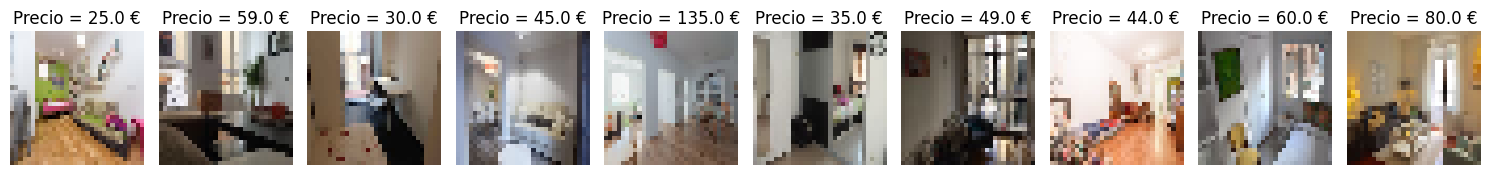

In [260]:
# Seleccionar aleatoriamente un índice inicial dentro del rango del DataFrame
idx = np.random.randint(5, df_train_airbnb.shape[0]-5)

# Crear una figura y ejes con subplots
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

# Iterar sobre los ejes y mostrar las imágenes y los precios correspondientes
for i, ax in enumerate(axes):
    # Verificar si todavía hay imágenes en el conjunto de datos
    if idx < images_train_airbnb.shape[0]:
        # Mostrar la imagen
        ax.imshow(images_train_airbnb[idx])
        # Establecer el título con el precio correspondiente
        ax.set_title(f'Precio = {df_train_airbnb["Price"][idx]} €')
        # Ocultar los ejes
        ax.axis('off')
        # Incrementar el índice para obtener la siguiente imagen
        idx += 1
    else:
        # Si no hay más imágenes, desactivar los ejes
        ax.axis('off')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Preprocesado

Generamos un mapa de calor para visualizar la matriz de correlación de las características del conjunto de datos de entrenamiento de Airbnb, excluyendo la variable 'Price', con el fin de identificar relaciones lineales entre las variables.

<ipython-input-261-2cf79c88cac5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = np.abs(df_train_airbnb.drop(['Price'], axis=1).corr())


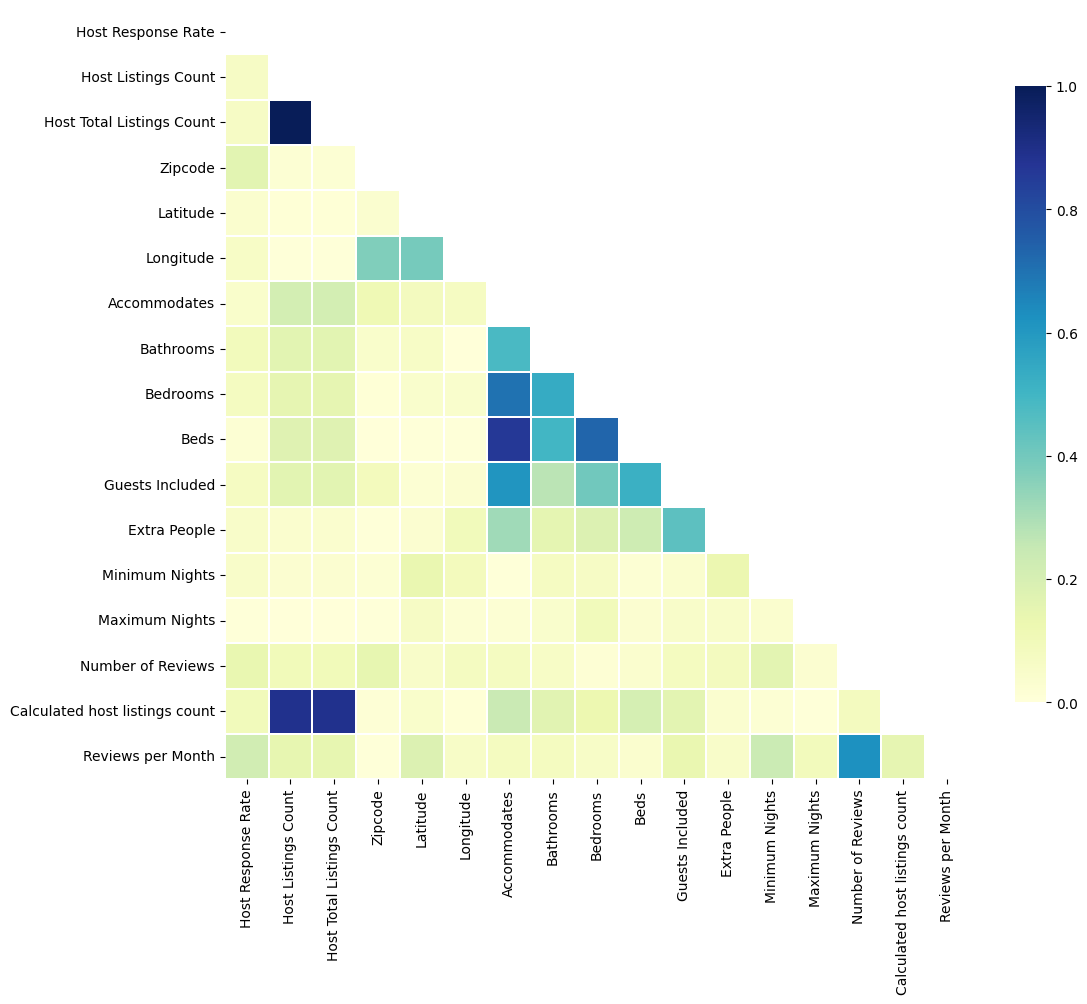

In [261]:
# Calcular la matriz de correlación
correlation_matrix = np.abs(df_train_airbnb.drop(['Price'], axis=1).corr())
# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Corrección aquí
# Configurar la figura de matplotlib
plt.figure(figsize=(12, 10))
# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(correlation_matrix, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

# Análisis de los datos de interés a ajustar.

Price Frequency

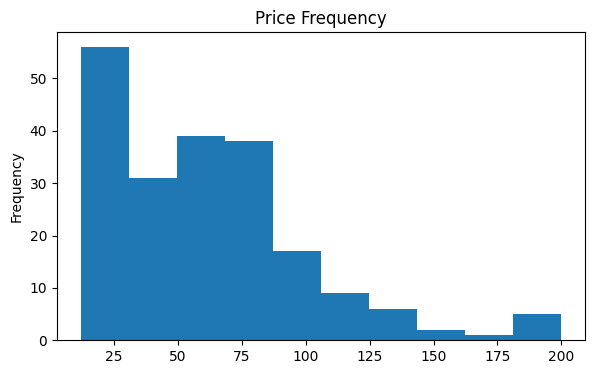

Como se puede corroborar ambas graficas confirman que la gran mayoría de los datos están distribuidos entre 20 a 100 euros. Esto nos permite definir un rango especifico análisis.


In [262]:
plt.figure(figsize=(15,4))
plt.subplot(1,2, 1)
df_train_airbnb['Price'].plot.hist(title='Price Frequency')
plt.show()
print("Como se puede corroborar ambas graficas confirman que la gran mayoría de los datos están distribuidos entre 20 a 100 euros. Esto nos permite definir un rango especifico análisis.")

<Axes: >

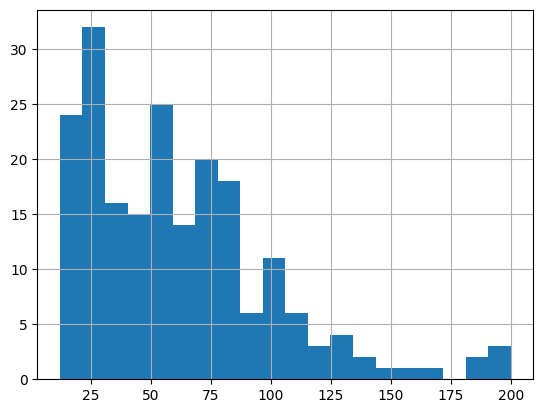

In [263]:
df_train_airbnb['Price'].hist(bins=20)

Property type

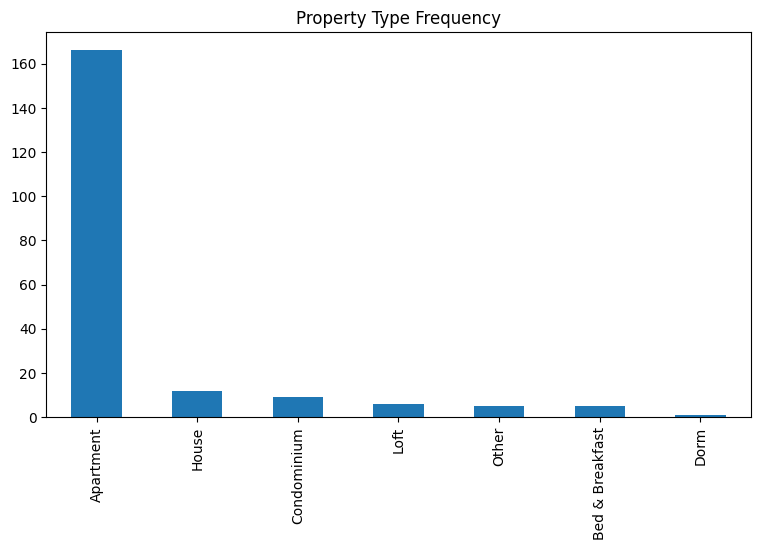

La gran mayoría de los inmuebles corresponden a apartamentos


In [264]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
df_train_airbnb['Property Type'].value_counts().plot(kind='bar',title='Property Type Frequency')
plt.show()
print("La gran mayoría de los inmuebles corresponden a apartamentos")

Room Type

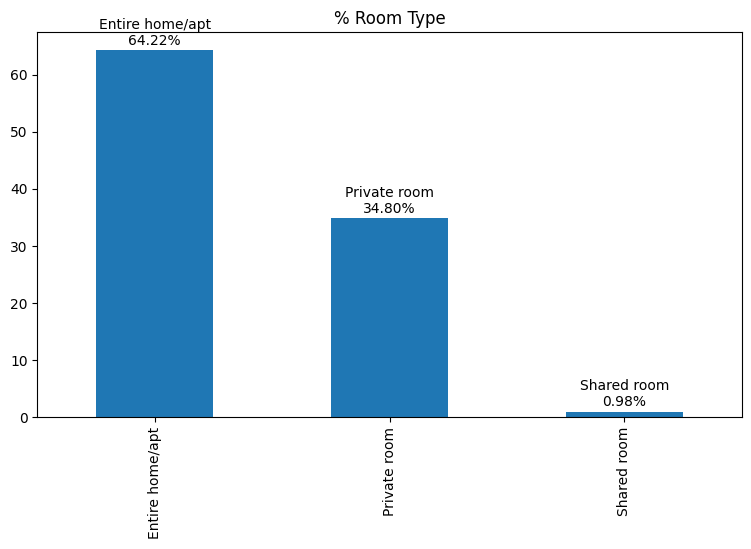

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Room Type'].value_counts() / len(df_train_airbnb['Room Type'])
counts = df_train_airbnb['Room Type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Room Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Bed Type

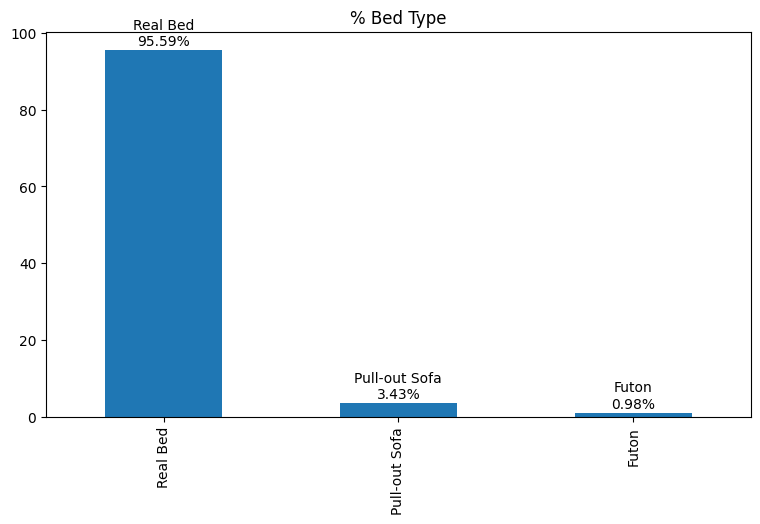

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Bed Type'].value_counts() / len(df_train_airbnb['Room Type'])
counts = df_train_airbnb['Bed Type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Bed Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Cancellation Policy

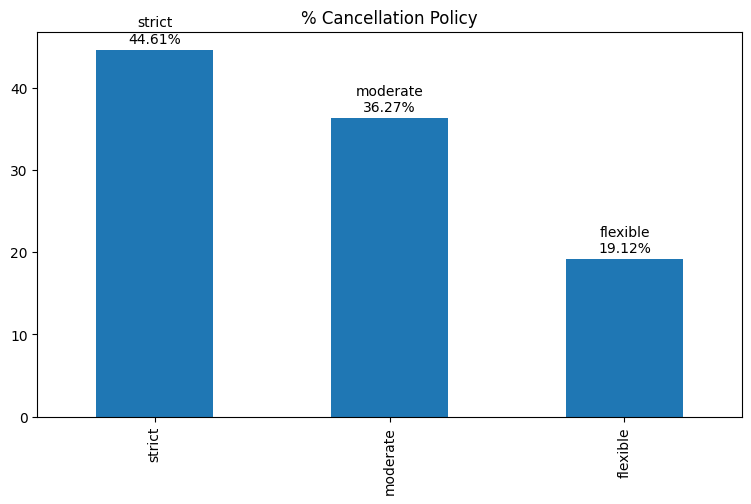

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Cancellation Policy'].value_counts() / len(df_train_airbnb['Cancellation Policy'])
counts = df_train_airbnb['Cancellation Policy'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Cancellation Policy')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Matriz de Alta Correlación.

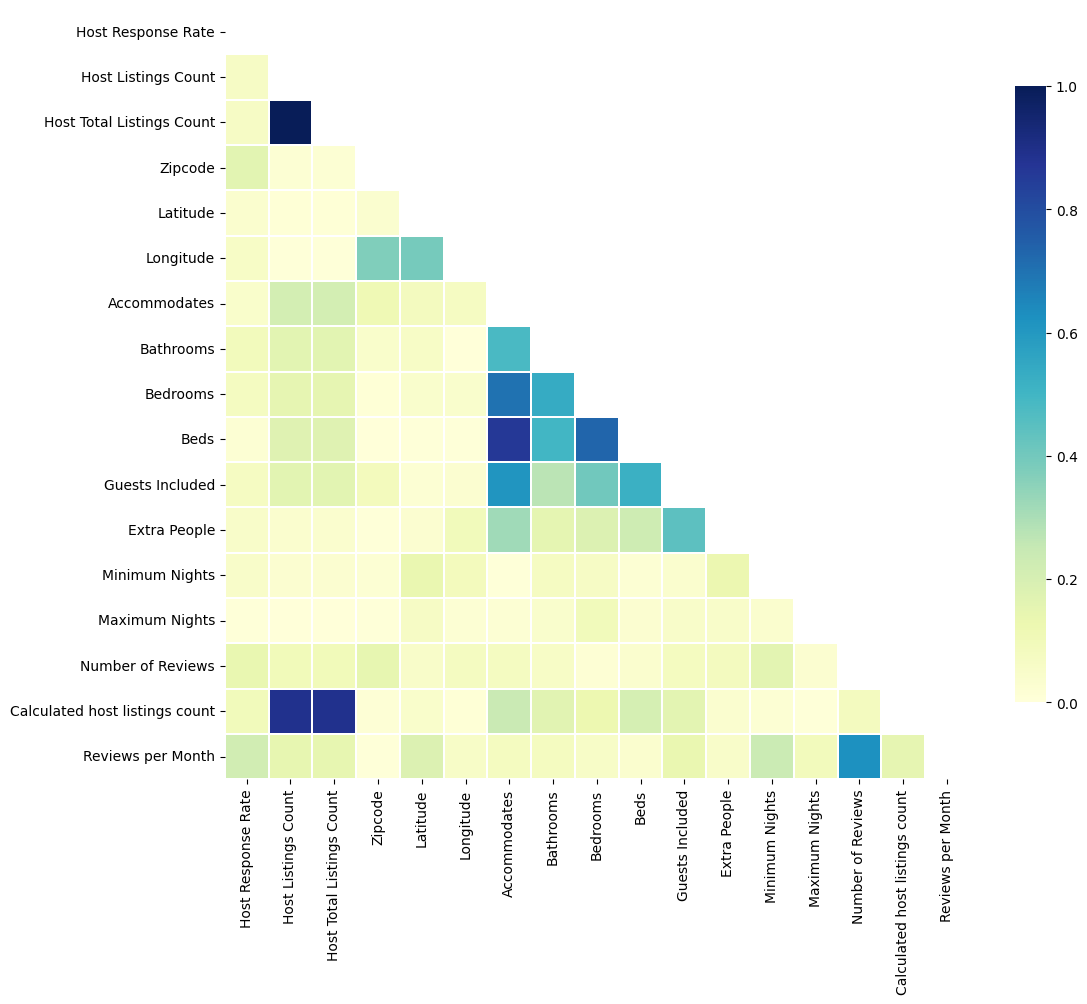

In [268]:
# Define la función para obtener columnas numéricas
def obtener_columnas_numericas(df):
    return df.select_dtypes(include=[np.number]).columns.tolist()
# Calcula la matriz de correlación
columnas_numericas = obtener_columnas_numericas(df_train_airbnb)
corr = np.abs(df_train_airbnb[columnas_numericas].drop(['Price'], axis=1).corr())
# Genera una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configura la figura de matplotlib
plt.figure(figsize=(12, 10))
# Dibuja el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=0.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})
plt.show()

Ahora calculamos la matriz de correlación entre las columnas numéricas del DataFrame df_train_airbnb.

In [269]:
df_train_airbnb[list(df_train_airbnb.columns.values)].corr(numeric_only=True)

,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Calculated host listings count,Reviews per Month
Host Response Rate,1.000000,-0.062574,-0.062574,-0.163031,-0.037439,-0.060871,0.044422,-0.092214,-0.077011,-0.020821,0.043878,0.073479,0.052428,-0.051752,0.007479,0.137782,-0.096048,0.214896
Host Listings Count,-0.062574,1.000000,1.000000,-0.022584,0.011130,-0.007586,0.211115,0.160749,0.150288,0.173463,0.221719,0.161874,0.037811,-0.027774,-0.001574,-0.098959,0.888549,-0.145137
Host Total Listings Count,-0.062574,1.000000,1.000000,-0.022584,0.011130,-0.007586,0.211115,0.160749,0.150288,0.173463,0.221719,0.161874,0.037811,-0.027774,-0.001574,-0.098959,0.888549,-0.145137
Zipcode,-0.163031,-0.022584,-0.022584,1.000000,-0.032626,0.372237,-0.116914,0.044039,-0.011308,-0.003723,-0.271691,-0.089102,-0.004901,-0.019580,-0.004357,-0.147445,-0.015103,0.006503
Latitude,-0.037439,0.011130,0.011130,-0.032626,1.000000,0.394369,-0.083181,0.060716,0.041598,-0.006603,0.104142,-0.019892,-0.029758,0.135323,-0.063431,-0.052423,0.045952,-0.180245
Longitude,-0.060871,-0.007586,-0.007586,0.372237,0.394369,1.000000,-0.073185,0.001018,0.040286,-0.005298,-0.031480,0.029537,0.095261,0.086307,-0.021942,-0.075463,-0.008465,-0.056623
Accommodates,0.044422,0.211115,0.211115,-0.116914,-0.083181,-0.073185,1.000000,0.480567,0.702838,0.859674,0.668030,0.610925,0.319383,-0.004991,0.020962,0.075952,0.238991,0.079663
Bathrooms,-0.092214,0.160749,0.160749,0.044039,0.060716,0.001018,0.480567,1.000000,0.535668,0.497055,0.417245,0.272925,0.153649,0.074103,-0.042695,0.060180,0.167877,-0.081772
Bedrooms,-0.077011,0.150288,0.150288,-0.011308,0.041598,0.040286,0.702838,0.535668,1.000000,0.730660,0.540617,0.404449,0.179807,0.066060,-0.096624,-0.018788,0.128490,-0.056132
Beds,-0.020821,0.173463,0.173463,-0.003723,-0.006603,-0.005298,0.859674,0.497055,0.730660,1.000000,0.549880,0.522870,0.228658,0.023153,-0.028994,0.038645,0.203985,0.035253



Para obtener una visión comprensiva de las relaciones entre las variables en cuestión, realizamos un scatter plot que muestre cada variable en comparación con las demás. No obstante, debido al considerable número de variables, la distinción entre ellas se vuelve complicada.
     

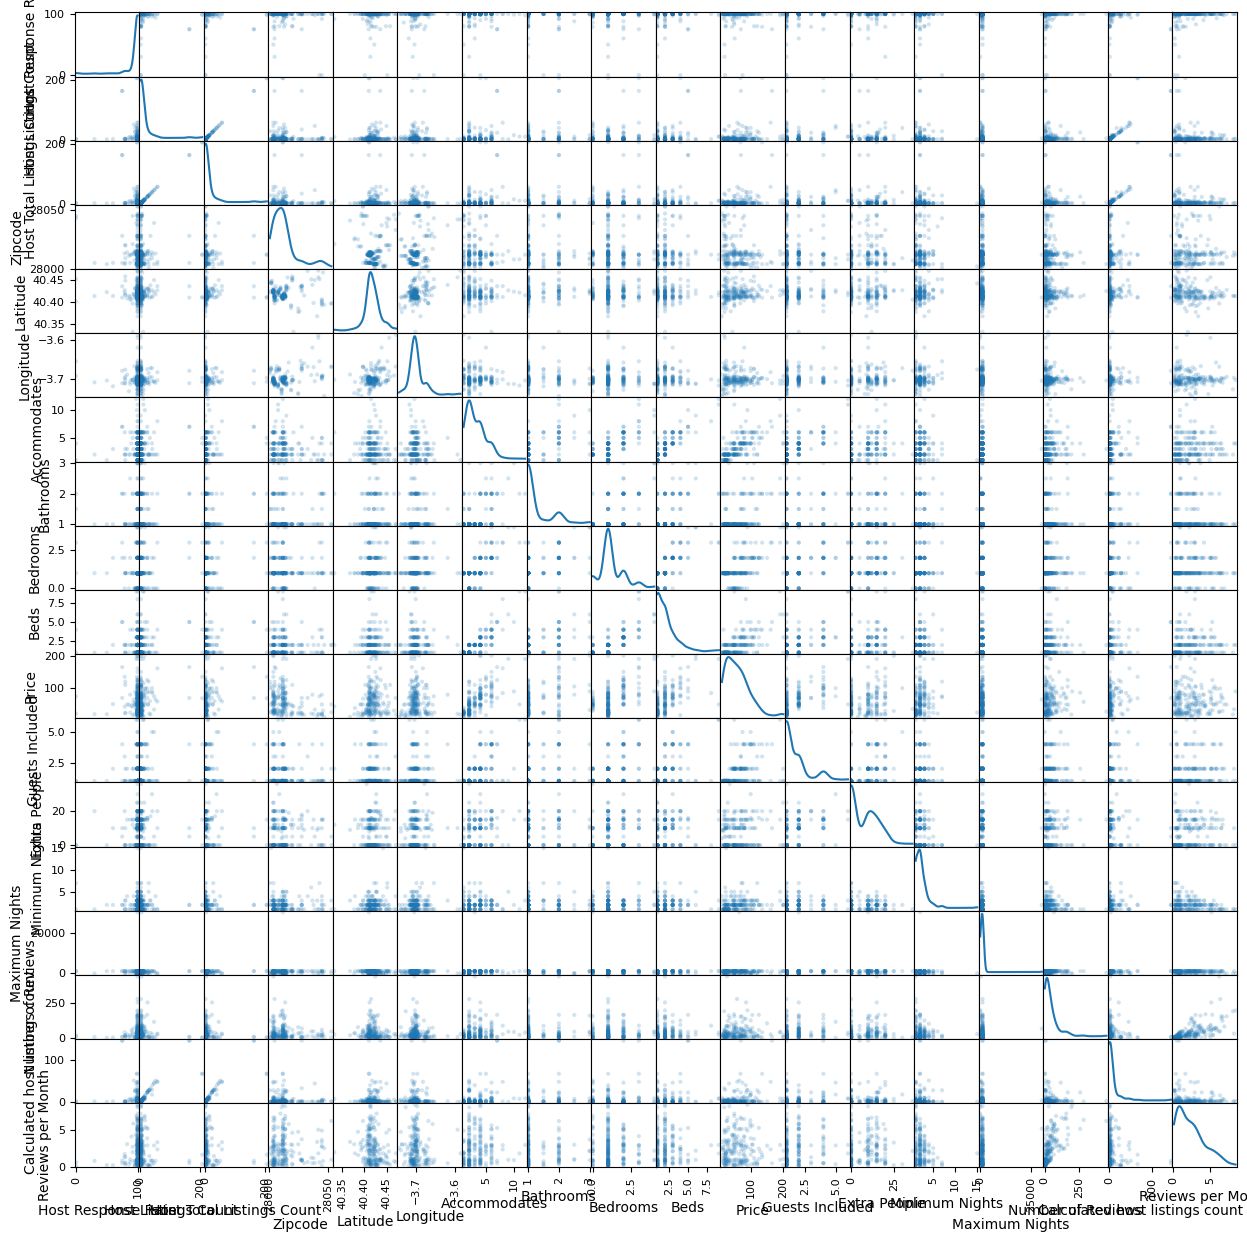

In [270]:
pd.plotting.scatter_matrix(df_train_airbnb, alpha=0.2, figsize=(15, 15), diagonal = 'kde')
plt.show()

# Resumen preprocesamiento

Se calcula la distancia en metros entre dos puntos geográficos utilizando la fórmula de la distancia haversine. La distancia se calcula a partir de las coordenadas de latitud y longitud de dos ubicaciones.

In [271]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    r = 6371
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return c * r * 1000

In [272]:
useful_data = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                'Host Name', 'Host Location', 'Host Thumbnail Url', 'Host Picture Url',
                'Host Neighbourhood','City', 'Market', 'Country Code', 'Country', 'Has Availability',
                'License', 'Jurisdiction Names','Street','State','Name','Host About','First Review',
                'Last Review', 'Calendar last Scraped', 'Geolocation','Host Acceptance Rate',
                'Square Feet', 'Security Deposit', 'Amenities', 'Availability 30', 'Availability 60',
                'Availability 90', 'Availability 365','Review Scores Rating', 'Review Scores Accuracy',
                'Review Scores Cleanliness', 'Review Scores Checkin', 'Cleaning Fee', 'Host Acceptance Rate',
                'Review Scores Communication', 'Review Scores Location', 'Monthly Price',
                'Review Scores Value', 'Jurisdiction Names', 'Weekly Price','Host Response Time','Neighbourhood','Thumbnail Url'
            ]

In [208]:
df_train_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,261.0,93.072797,19.534941,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,301.0,11.009967,31.101820,1.000000,1.000000,2.000000,4.000000,207.000000
Host Total Listings Count,301.0,11.009967,31.101820,1.000000,1.000000,2.000000,4.000000,207.000000
Zipcode,301.0,27930.551495,1453.148199,2804.000000,28005.000000,28012.000000,28015.000000,28053.000000
Latitude,301.0,40.419186,0.018483,40.334291,40.409954,40.418231,40.425950,40.486556
Longitude,301.0,-3.697203,0.021713,-3.774721,-3.707866,-3.702155,-3.693721,-3.582776
Accommodates,301.0,3.112957,1.860250,1.000000,2.000000,2.000000,4.000000,12.000000
Bathrooms,301.0,1.239203,0.611766,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,301.0,1.249169,0.770957,0.000000,1.000000,1.000000,1.000000,4.000000
Beds,300.0,1.980000,1.560250,1.000000,1.000000,2.000000,2.000000,16.000000


In [273]:
df_train_airbnb.shape

(204, 33)

In [274]:
def elimina_columnas(df, columnas):
    df = df.drop(columns=columnas, errors='ignore')
    return df


def prepoc_df(df, images_tot):
    # Longitud y Latitud centro Madrid para calcular la distancia haversine
    centro_madrid_lat = 40.41831
    centro_madrid_lon = -3.70275

    # Quitamos las columnas con su mayoría de variables a nulos
    df = elimina_columnas(df, useful_data)

    # Nos quedamos solo con los apartamentos
    df = df[df['Property Type'] == 'Apartment']  # Apartment

    # Room type diferente a shared
    df = df[df['Room Type'] != 'Shared room'] # Shared room

    # Bed type igual a Real bed
    df = df[df['Bed Type'] == 'Real Bed'] # Real Bed

    # Price entre 9 y 100 €
    df = df[(df['Price'] > 9) & (df['Price'] <= 100)]

    # Aplicamos distancia haversine para saber a qué distancia del centro están
    df = df.assign(centro =  lambda x: haversine_distance(x['Latitude'],x['Longitude'],centro_madrid_lat,centro_madrid_lon))

    # Eliminamos columnas las cuales hemos generado nuevas variables
    df = elimina_columnas(df, ['Longitude', 'Latitude'])

    # Se rellenan valores nulos con la media
    df.fillna(df.mean(), inplace=True)

    #Filtrar imagenes
    images_tot =  images_tot[df.index]

    return df, images_tot

In [275]:
#Cargamos los datos de test
test_airbnb_df  = pd.read_csv('test_airbnb.csv', sep=';', decimal='.')
images_test_airbnb  = np.load("test_images_airbnb.npy")

valid_airbnb_df  = pd.read_csv('valid_airbnb.csv', sep=';', decimal='.')
images_valid_airbnb  = np.load("valid_images_airbnb.npy")

In [276]:
df_train_prepoc,images_train_airbnb = prepoc_df(df_train_airbnb,images_train_airbnb)
df_test_prepoc,images_test_airbnb = prepoc_df(test_airbnb_df,images_test_airbnb)
df_valid_prepoc,images_valid_airbnb = prepoc_df(valid_airbnb_df,images_valid_airbnb)

<ipython-input-274-e2656706c4dd>:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-274-e2656706c4dd>:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-274-e2656706c4dd>:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence t

In [277]:
print(f'Dimensiones del dataset de train después del preprocesamiento: {df_train_prepoc.shape}')
print(f'Dimensiones del dataset de test después del preprocesamiento: {df_test_prepoc.shape}')
print(f'Dimensiones del dataset de valid después del preprocesamiento: {df_valid_prepoc.shape}')

Dimensiones del dataset de train después del preprocesamiento: (133, 29)
Dimensiones del dataset de test después del preprocesamiento: (18, 29)
Dimensiones del dataset de valid después del preprocesamiento: (18, 29)


Proceso de validación

In [278]:
df_train_prepoc.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,133.0,96.187970,14.846258,0.000000,100.000000,100.000000,100.00000,100.000000
Host Listings Count,133.0,9.398496,24.843736,1.000000,1.000000,2.000000,4.00000,207.000000
Host Total Listings Count,133.0,9.398496,24.843736,1.000000,1.000000,2.000000,4.00000,207.000000
Zipcode,133.0,28013.451128,10.823282,28001.000000,28005.000000,28012.000000,28014.00000,28053.000000
Accommodates,133.0,3.060150,1.726616,1.000000,2.000000,3.000000,4.00000,11.000000
Bathrooms,133.0,1.161654,0.396714,1.000000,1.000000,1.000000,1.00000,3.000000
Bedrooms,133.0,1.105263,0.688247,0.000000,1.000000,1.000000,1.00000,4.000000
Beds,133.0,1.872180,1.257785,1.000000,1.000000,2.000000,2.00000,9.000000
Price,133.0,52.473684,24.526602,12.000000,30.000000,50.000000,72.00000,100.000000
Guests Included,133.0,1.593985,0.961671,1.000000,1.000000,1.000000,2.00000,6.000000


In [279]:
df_train_prepoc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 203
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             133 non-null    object 
 1   Host Since                      133 non-null    object 
 2   Host Response Rate              133 non-null    float64
 3   Host Listings Count             133 non-null    float64
 4   Host Total Listings Count       133 non-null    float64
 5   Host Verifications              133 non-null    object 
 6   Neighbourhood Cleansed          133 non-null    object 
 7   Neighbourhood Group Cleansed    133 non-null    object 
 8   Zipcode                         133 non-null    int64  
 9   Smart Location                  133 non-null    object 
 10  Property Type                   133 non-null    object 
 11  Room Type                       133 non-null    object 
 12  Accommodates                    133 

In [280]:
df_train_prepoc.isna().sum()

Experiences Offered               0
Host Since                        0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
Zipcode                           0
Smart Location                    0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  0
Number of Reviews                 0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Features                    

In [281]:
df_train_prepoc.isnull().any()

Experiences Offered               False
Host Since                        False
Host Response Rate                False
Host Listings Count               False
Host Total Listings Count         False
Host Verifications                False
Neighbourhood Cleansed            False
Neighbourhood Group Cleansed      False
Zipcode                           False
Smart Location                    False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Price                             False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Number of Reviews                 False
Cancellation Policy               False


In [282]:

#Aplicamos la media a valores nulos
df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)] = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].mean())
df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)] = df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_test_prepoc)].mean())


#Creación X_train , y_train , X_test e y_test
features = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].columns.drop(['Price'])
X_train = df_train_prepoc[features].values
y_train = df_train_prepoc['Price'].values
X_test  = df_test_prepoc[features].values
y_test  = df_test_prepoc['Price'].values
X_valid  = df_test_prepoc[features].values
y_valid  = df_test_prepoc['Price'].values


#Escalamos (con los datos de train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(133, 16)
(133,)
(18, 16)
(18,)
(18, 16)
(18,)


In [283]:
# Convertiendo las etiquetas de clase en un formato de codificación one-hot.
y_train_cat =  to_categorical(y_train)
y_valid_cat =  to_categorical(y_valid)
y_test_cat  =  to_categorical(y_test)

# Modelado

El código define y entrena un modelo de red neuronal de perceptrón multicapa (MLP) utilizando TensorFlow/Keras. Este modelo tiene una arquitectura simple con una capa de entrada, dos capas ocultas y una capa de salida.

1. Optimizador:
  *  En el primer script, se utiliza un optimizador SGD (Gradiente Descendente Estocástico) con una tasa de aprendizaje fija y un término de decaimiento (decay) para ajustar la tasa de aprendizaje durante el entrenamiento.
  *  En el segundo script, se utiliza el optimizador Adam, que es un algoritmo de optimización adaptativo que ajusta automáticamente la tasa de aprendizaje.
2. Definición del modelo:
  *  En el primer script, el modelo se define secuencialmente agregando capas una por una utilizando modelMLP.add().
  *  En el segundo script, el modelo se define utilizando una lista de capas pasadas como argumento al constructor Sequential, lo que permite definir todas las capas de manera más compacta.
3. Compilación del modelo:
  *  En ambos scripts, el modelo se compila con la misma función de pérdida (mean_squared_error) y función de optimización.
4. Entrenamiento del modelo:
  *  Ambos modelos se entrenan de la misma manera utilizando los mismos datos de entrenamiento, validación y prueba, así como el mismo tamaño de lote y número de épocas.

 SGD (Gradiente Descendente Estocástico)

In [284]:
input_dim = X_train.shape[1]

modelMLP = Sequential()
modelMLP.add(Dense(8, input_dim=input_dim, activation="relu"))
modelMLP.add(Dense(4, activation="relu"))
modelMLP.add(Dense(1, activation="linear"))

epochs = 50
learning_rate = 0.01
decay= learning_rate / epochs
opt = tf.keras.optimizers.legacy.SGD(lr=learning_rate, decay=decay)
modelMLP.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO] training model...")
history = modelMLP.fit(x=X_train, y=y_train_cat, shuffle=True, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid_cat), verbose=1)

# Evaluamos el modelo
loss = modelMLP.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')

print("[INFO] predicting house prices...")
preds = modelMLP.predict(X_test)
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
print("[INFO] Imprimo error en porcentaje...")
print(absPercentDiff)

[INFO] training model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 1s 54ms/step - loss: 0.4208 - val_loss: 0.1530
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3030 - val_loss: 0.1179
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.2267 - val_loss: 0.0963
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.1782 - val_loss: 0.0784
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1416 - val_loss: 0.0678
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1207 - val_loss: 0.0592
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.1036 - val_loss: 0.0519
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0870 - val_loss: 0.0476
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0783 - val_loss: 0.0438
Epoch 10/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0697 - val_loss: 0.0408
Epoch 11/50
5/5 [===========================

[INFO] scores...
Loss=3048.424560546875
[INFO] predicting house prices...
1/1 [==============================] - 0s 58ms/step
[INFO] Imprimo error en porcentaje...
[ 99.93600649  99.80807578  99.98136365  99.92276888  99.38775917
  99.95208283  99.96669928  99.7904776  100.42141244 100.22252761
  99.86510598  99.87536335  99.89334507  99.94820044 100.02467237
 100.53780218 100.00260955  99.8825477 ]


optimizador Adam

In [ ]:
# input_dim = X_train.shape[1]

# modelMLP = Sequential([
#     Dense(8, input_dim=input_dim, activation="relu"),
#     Dense(4, activation="relu"),
#     Dense(1, activation="linear")
# ])

# epochs = 50
# learning_rate = 0.01
# opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# modelMLP.compile(loss="mean_squared_error", optimizer=opt)

# print("[INFO] training model...")
# history = modelMLP.fit(x=X_train, y=y_train_cat, shuffle=True, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid_cat), verbose=1)

# # Evaluamos el modelo
# loss = modelMLP.evaluate(X_test, y_test)

# print("[INFO] scores...")
# print(f'Loss={loss}')

# print("[INFO] predicting house prices...")
# preds = modelMLP.predict(X_test)
# diff = preds.flatten() - y_test
# percentDiff = (diff / y_test) * 100
# absPercentDiff = np.abs(percentDiff)
# print("[INFO] Imprimo error en porcentaje...")
# print(absPercentDiff)

El siguiente código compila un modelo de redes neuronales multicapa (MLP) utilizando la función de pérdida de entropía cruzada categórica, el optimizador Adam y mide la precisión como métrica. Luego, imprime un resumen del modelo, mostrando la arquitectura de las capas y el número de parámetros entrenables.

In [285]:
modelMLP.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
modelMLP.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


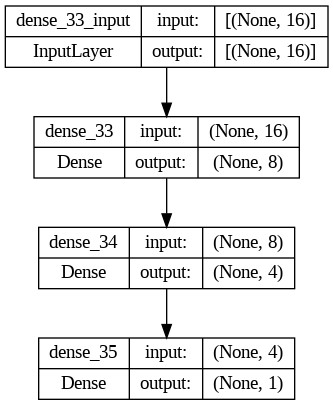

In [286]:
plot_model(modelMLP, show_shapes=True, show_layer_names=True)

El código muestra un gráfico de la pérdida (loss) del modelo a lo largo de las épocas tanto para el conjunto de entrenamiento como para el conjunto de prueba.

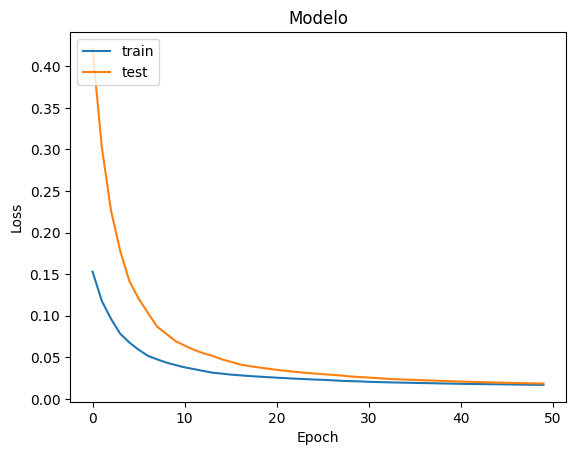

In [287]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Modelado Imagenes

Regresion con CNN

Este código define y entrena un modelo de red neuronal convolucional (CNN) utilizando TensorFlow y Keras. El modelo tiene tres capas convolucionales seguidas de capas de agrupación máxima (max pooling) y capas de abandono (dropout) para evitar el sobreajuste. Luego, hay una capa completamente conectada con activación ReLU y restricción de norma máxima (max_norm). Finalmente, hay una capa de salida con una neurona para la regresión lineal.

In [288]:
# Inicializamos el modelo
modelCNN = Sequential()

# Definimos una capa convolucional
modelCNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una segunda capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una tercera capa convolucional
modelCNN.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Añadimos nuestra "salida" con 1 neurona para la regresión lineal
modelCNN.add(Flatten())
modelCNN.add(Dense(512, activation='relu', kernel_regularizer = L1(0.01)))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(1, activation='linear'))


# Compilamos el modelo
epochs = 50
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
modelCNN.compile(loss="mean_squared_error", optimizer=opt)

# Entrenamos el modelo
historyCNN = modelCNN.fit(x=images_train_airbnb, y=y_train_cat, batch_size=64, shuffle=True, validation_data=(images_valid_airbnb, y_valid_cat), epochs=epochs, verbose=1)

# Evaluamos el modelo
lossCNN = modelCNN.evaluate(images_test_airbnb, y_test_cat)

Epoch 1/50
3/3 [==============================] - 5s 333ms/step - loss: 161.2721 - val_loss: 148.9888
Epoch 2/50
3/3 [==============================] - 1s 150ms/step - loss: 146.3517 - val_loss: 134.7882
Epoch 3/50
3/3 [==============================] - 1s 155ms/step - loss: 132.2512 - val_loss: 121.3365
Epoch 4/50
3/3 [==============================] - 1s 148ms/step - loss: 118.9362 - val_loss: 108.6128
Epoch 5/50
3/3 [==============================] - 1s 155ms/step - loss: 106.3525 - val_loss: 96.6544
Epoch 6/50
3/3 [==============================] - 1s 149ms/step - loss: 94.5302 - val_loss: 85.4262
Epoch 7/50
3/3 [==============================] - 1s 156ms/step - loss: 83.4356 - val_loss: 74.9264
Epoch 8/50
3/3 [==============================] - 1s 151ms/step - loss: 73.0631 - val_loss: 65.1197
Epoch 9/50
3/3 [==============================] - 1s 159ms/step - loss: 63.3929 - val_loss: 56.0509
Epoch 10/50
3/3 [==============================] - 1s 148ms/step - loss: 54.4551 - val_loss

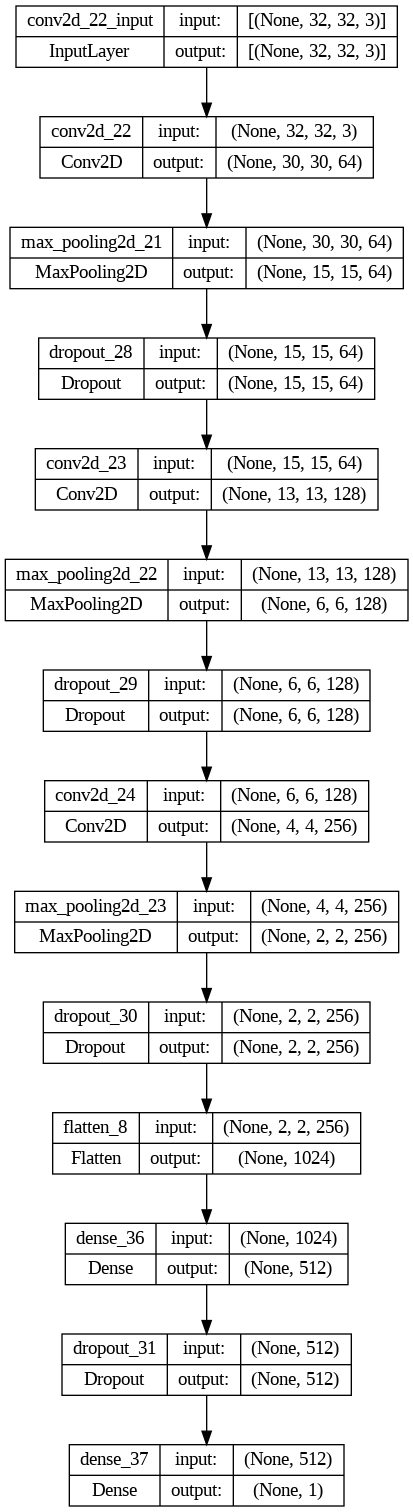

In [290]:
plot_model(modelCNN, show_shapes=True, show_layer_names=True)

In [291]:
modelCNN.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 6, 6, 128)       


El código proporcionado crea un gráfico que muestra la evolución de la pérdida (loss) del modelo a lo largo de las épocas durante el entrenamiento.

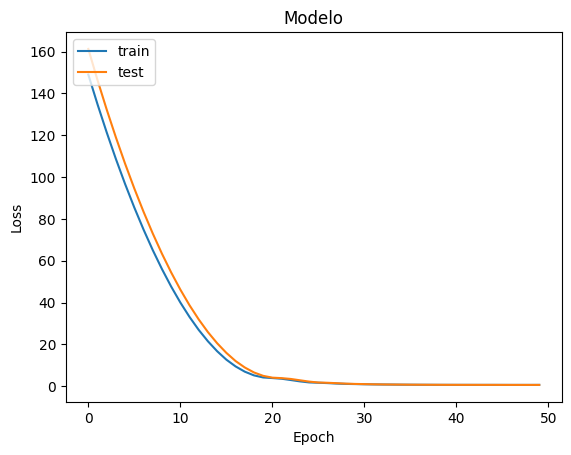

In [292]:
plt.plot(historyCNN.history['val_loss'])
plt.plot(historyCNN.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Combinación datos tabulares e imágenes

El código realiza la unificación y concatenación de las salidas de dos modelos de redes neuronales (MLP y CNN), luego obtiene la forma de la entrada combinada, divide los datos en conjuntos de entrenamiento y prueba, y finalmente imprime las formas de los conjuntos de entrenamiento y prueba junto con la forma de `y_test`.

In [293]:
# Definir las salidas de los modelos MLP y CNN
outputMLP = modelMLP.output
outputCNN = modelCNN.output

# Definir dos conjuntos de entradas
inputShapeMLP = outputMLP.shape[1]
inputShapeCNN = outputCNN.shape[1:]

inputMLP = Input(shape=(inputShapeMLP,), name='inputMLP')  # Corregido para especificar la forma correctamente
inputCNN = Input(shape=(32, 32, 3), name='inputCNN')  # Corregido para especificar la forma correctamente

# La primera rama opera sobre la primera entrada (salida de MLP)
x = Dense(8, activation="relu")(inputMLP)
x = Dense(4, activation="relu")(x)
output_x = Dense(4, activation="relu")(x)  # Añadimos una capa de salida para 'x'
x = Model(inputs=inputMLP, outputs=output_x)

# La segunda rama opera sobre la segunda entrada (salida de CNN)
y = Conv2D(128, 3)(inputCNN)
y = Flatten()(y)
y = Dense(32, activation="relu")(y)
output_y = Dense(4, activation="relu")(y)  # Añadimos una capa de salida para 'y'
y = Model(inputs=inputCNN, outputs=output_y)

# Combinar las salidas de las dos ramas
combined = Concatenate()([output_x, output_y])  # Usamos las capas de salida 'output_x' y 'output_y'

# Aplicar una capa totalmente conectada y luego una predicción de regresión sobre las salidas combinadas
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)

# Nuestro modelo aceptará las entradas de las dos ramas y luego generará un único valor de salida
history = Model(inputs=[x.input, y.input], outputs=z)



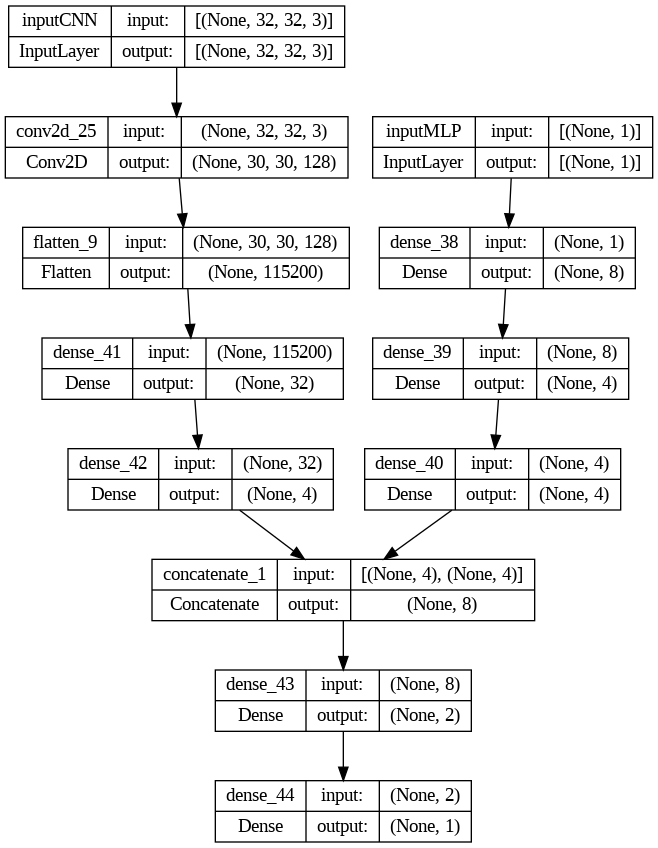

In [294]:
plot_model(history, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [295]:
history.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputCNN (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 inputMLP (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 30, 30, 128)          3584      ['inputCNN[0][0]']            
                                                                                                  
 dense_38 (Dense)            (None, 8)                    16        ['inputMLP[0][0]']            
                                                                                            

# CONCLUSIÓN

Durante el desarrollo de la práctica, se crearon tres tipos distintos de modelos para procesar los datos:

1. Modelo MLP (Perceptrón Multicapa): Este modelo se diseñó específicamente para procesar datos tabulares. Se trata de un modelo secuencial, lo que implica que las capas están apiladas secuencialmente una detrás de otra. Este modelo se desarrolló como un modelo de regresión simple, capaz de tomar una entrada y generar una salida numérica.

2. Modelo CNN (Red Neuronal Convolucional): Para el procesamiento de imágenes, se implementó un modelo de red neuronal convolucional. Este modelo sigue una arquitectura secuencial, con capas convolucionales intercaladas con capas de agrupación máxima (max pooling) y capas de abandono (dropout). La salida resultante se aplana y se conecta a través de capas densas para producir la salida final.

3. Modelo Híbrido: Se desarrolló un modelo híbrido que combina información tanto del modelo MLP como del modelo CNN. Esta combinación de ramas permite que el modelo aprenda patrones de datos tanto estructurados como de imágenes, lo que resulta útil en problemas que requieren el análisis de múltiples tipos de datos.

Al analizar los gráficos de los modelos MLP y CNN, se observa que las curvas de testing siguen de cerca el comportamiento de las curvas de training. Este fenómeno sugiere que los modelos individuales fueron entrenados de manera adecuada y no muestran signos de sobreajuste o subajuste en los datos de testing. Es razonable esperar que el modelo híbrido, construido a partir de las salidas de los modelos individuales (MLP y CNN), también presente un comportamiento similar en términos de ajuste durante el entrenamiento y la evaluación.

Sin embargo, es importante mencionar que, para los propósitos de esta práctica, no se llevó a cabo una evaluación y validación específica del rendimiento de los modelos híbrido, MLP y CNN. Más allá de los análisis presentados a lo largo de este documento, no se realizaron pruebas exhaustivas para evaluar el rendimiento individual de cada modelo en términos de métricas específicas como precisión, recall, F1-score, entre otras.